<a href="https://colab.research.google.com/github/purnaloke/data-science-projects/blob/main/Time_Series_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/dataset for ARIMA.csv")
df.index = pd.to_datetime(df["time"], dayfirst=True)
print(df)

                  time  tavg  tmin  tmax  prcp
time                                          
1990-01-01  01-01-1990  25.2  22.8  28.4   0.5
1990-01-02  02-01-1990  24.9  21.7  29.1   0.0
1990-01-03  03-01-1990  25.6  21.4  29.8   0.0
1990-01-04  04-01-1990  25.7   NaN  28.7   0.0
1990-01-05  05-01-1990  25.5  20.7  28.4   0.0
...                ...   ...   ...   ...   ...
2022-07-21  21-07-2022  28.4  24.5  32.8  21.1
2022-07-22  22-07-2022  27.8  24.6  32.2  22.1
2022-07-23  23-07-2022  27.4  24.7  32.6  18.6
2022-07-24  24-07-2022  27.8  25.0  33.3   9.1
2022-07-25  25-07-2022  28.1  25.4  32.6   2.9

[11894 rows x 5 columns]


<Axes: xlabel='time'>

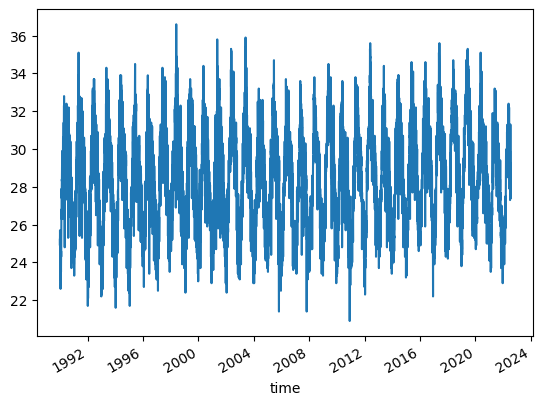

In [ ]:
temp = df["tavg"]
temp=temp.dropna()
temp.plot()

In [ ]:
def fun(df, window_size):
  df_to_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_to_np)-window_size):
    row=[[a] for a in df_to_np[i:i+window_size]]
    X.append(row)
    label = df_to_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)


In [ ]:
win=5
X, y = fun(temp, win)
X.shape, y.shape

((11862, 5, 1), (11862,))

In [ ]:
X_train, y_train = X[:8000], y[:8000]
X_val, y_val = X[8000:9500], y[8000:9500]
X_test, y_test = X[9500:], y[9500:]


X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((8000, 5, 1), (1500, 5, 1), (2362, 5, 1), (8000,), (1500,), (2362,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import *
from tensorflow.keras.layers import InputLayer
from keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, "relu"))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.src.engine.training import optimizer
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
250/250 [==============================] - 6s 18ms/step - loss: 3.0911 - root_mean_squared_error: 1.7582 - val_loss: 2.7357 - val_root_mean_squared_error: 1.6540
Epoch 2/10
250/250 [==============================] - 6s 24ms/step - loss: 1.7869 - root_mean_squared_error: 1.3368 - val_loss: 1.3413 - val_root_mean_squared_error: 1.1581
Epoch 3/10
250/250 [==============================] - 4s 18ms/step - loss: 1.2777 - root_mean_squared_error: 1.1304 - val_loss: 1.0993 - val_root_mean_squared_error: 1.0485
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 1.1860 - root_mean_squared_error: 1.0890 - val_loss: 1.0242 - val_root_mean_squared_error: 1.0120
Epoch 5/10
250/250 [==============================] - 4s 17ms/step - loss: 1.1310 - root_mean_squared_error: 1.0635 - val_loss: 0.9858 - val_root_mean_squared_error: 0.9929
Epoch 6/10
250/250 [==============================] - 4s 18ms/step - loss: 1.0856 - root_mean_squared_error: 1.0419 - val_loss: 0.9049 

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

250/250 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,25.572796,24.7
1,25.268568,25.4
2,25.486609,25.6
3,25.559462,24.8
4,25.159498,24.7
...,...,...
7995,24.453005,23.3
7996,24.134890,23.6
7997,24.043196,23.1
7998,23.725166,23.4


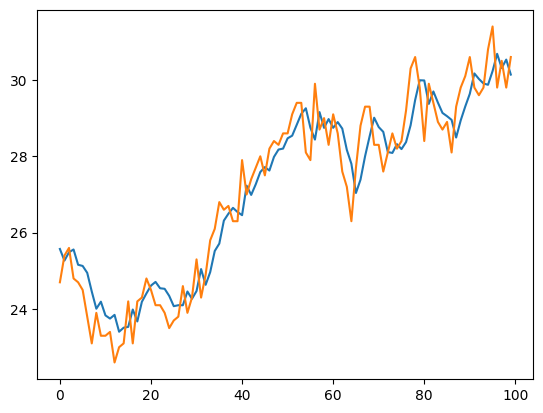

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])


In [ ]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals': y_val})
val_results

47/47 [==============================] - 1s 3ms/step


,Val Predictions,Actuals
0,25.005859,23.5
1,24.145149,22.7
2,23.791662,25.7
3,25.205490,25.7
4,25.150923,26.2
...,...,...
1495,26.178688,26.1
1496,26.179838,26.0
1497,26.140669,26.4
1498,26.276243,26.6


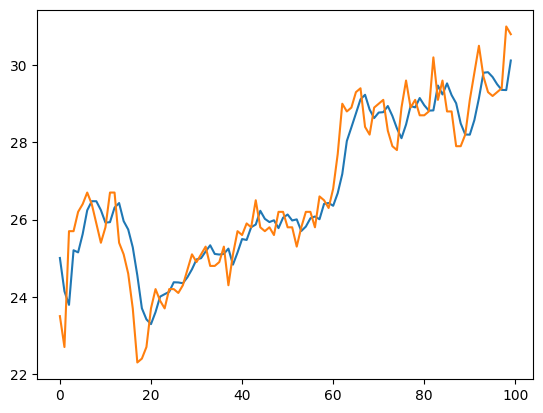

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals': y_test})
test_results

74/74 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,26.679953,26.1
1,26.414446,27.3
2,26.963232,26.7
3,26.792646,26.2
4,26.484324,27.8
...,...,...
2357,28.731340,28.4
2358,28.574459,27.8
2359,28.278948,27.4
2360,27.876398,27.8


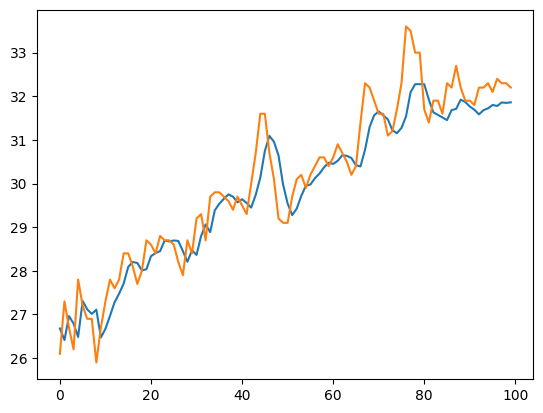

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])